In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [13]:
x = np.arange(-1,1,0.01)
y = 1 / (np.exp(x))

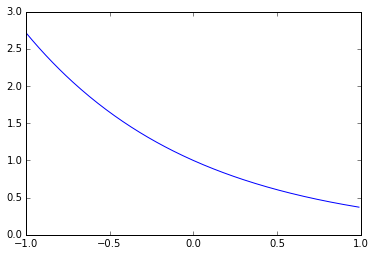

In [14]:
plt.plot(x,y)

In [120]:
def sqnorm(x):
    return np.dot(x,x)

In [121]:
def matching_pursuit(D, x, k_max=10, eps=1e-10):
    itr     = 0
    max_itr = 1000
    m, p    = D.shape
    alpha   = np.zeros(p)
    k = 0
    obj_values = []
    while k < k_max and itr < max_itr:
        d_prod = np.abs(np.dot(D.T, x - np.dot(D,alpha)))
        j = np.argmax(d_prod)
        if alpha[j] == 0:
            k += 1
        
        alpha[j] += d_prod[j]
        itr += 1
        diff = sqnorm(x - np.dot(D,alpha))
        obj_values.append(diff)
    
    return (alpha, obj_values)


In [138]:
m = 16              # dimension of each atom
p = 10              # number of atoms
rand = np.random.rand
D = rand(m*p).reshape(m,p)    # dictionary
x = rand(m)
# normalise by column
D = D / D.sum(axis=0)
x = x / x.sum()

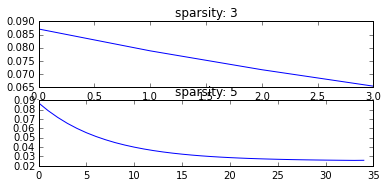

In [145]:
alpha, obj_values = matching_pursuit(D, x, k_max=3)
s = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 1)
plt.title(s)
plt.plot(np.array(obj_values))

alpha, obj_values = matching_pursuit(D, x, k_max=5)
s2 = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 2)
plt.title(s2)
plt.plot(np.array(obj_values))

In [146]:
def orthogonal_matching_pursuit(D, x, k_max=10, eps=1e-10):
    itr     = 0
    max_itr = 1000
    m, p    = D.shape
    k = 0
    alpha   = np.zeros(p)
    active_set = []
    obj_values = []
    while len(active_set) < k_max and itr < max_itr:
        min_j = 0
        min_beta = 0
        delta = sqnorm(x)
        for j in xrange(p):
            if j not in active_set:
                gamma = active_set + [j]
                D_gamma = D[:,gamma]
                # Compute: (D_gamma.T * D_gamma)^-1 * D_gamma.T * x
                beta = np.dot(np.dot(np.linalg.inv(np.dot(D_gamma.T,D_gamma)),D_gamma.T),x)
                x_projected = np.dot(D_gamma, beta)
                curr_delta = sqnorm(x - x_projected)
                if curr_delta <= delta:
                    min_j = j
                    min_beta = beta
        
        # update active set and the solution alpha
        active_set += [j]
        alpha[active_set] = beta
        complement_set = [idx for idx in xrange(p) if idx not in active_set ]
        alpha[complement_set] = 0
        itr += 1
        diff = np.linalg.norm(x - np.dot(D,alpha))
        obj_values.append(diff)
    
    return (alpha, obj_values)


In [147]:
m = 16              # dimension of each atom
p = 16              # number of atoms
rand = np.random.rand
D = rand(m*p).reshape(m,p)    # dictionary
x = rand(m)
# normalise by column
D = D / D.sum(axis=0)
x = x / x.sum()

alpha, obj_values = orthogonal_matching_pursuit(D, x, k_max=3)
s = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 1)
plt.title(s)
plt.plot(np.array(obj_values))

alpha, obj_values = orthogonal_matching_pursuit(D, x, k_max=5)
s2 = "sparsity: {}".format(len(np.nonzero(alpha)[0]))
plt.subplot(3, 1, 2)
plt.title(s2)
plt.plot(np.array(obj_values))

LinAlgError: Singular matrix

In [137]:
a = np.arange(0,12).reshape(2,6)
a[:,~np.array([0])]

array([[ 5],
       [11]])

In [118]:
[1, 2, 3] + [4]

[1, 2, 3, 4]